# Pymaceutical Observations
<ul>
    <li> Capomulin was the only drug to reduce the size of the tumors in the study over time. All other drugs had no lowering effect on the tumors growth rate. Capomulin also performed best in survival rates. </li>
    <li> Metastatic site still increased with Capulin, however at a much slower rate than the other drugs. Most drugs did slow down metastatic sites compared to the placebo, although Ketapril overlapped with the placebo making it the worst performing drug in the study. </li>
    <li> Infubinol, while average in it's treatment, caused the lowest survival rate over time, even lower than the placebo, which makes this drug a dangerous treatment option. </li>

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [4]:
# Read the Clinical Trial Data
ct_df = pd.read_csv(clinical_trial_data_to_load)

ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Read the Mouse and Drug Data 
mouse_df = pd.read_csv(mouse_drug_data_to_load)

mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
# Combine the data into a single dataset
merged_data = pd.merge(ct_df,mouse_df,on='Mouse ID',how='left')

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [35]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = merged_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
mean_df = grouped_df.mean()

# Convert to DataFrame
mean_df = mean_df.reset_index()

# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror = grouped_df.sem()

stderror_df = pd.DataFrame(stderror)

stderror_df.reset_index(inplace=True)
stderror_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Mean Data Frame
pivot_mean_df = mean_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_mean_df.head(20)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
# Minor Data Munging to Re-Format the Error Data Frame
pivot_stderror_df = stderror_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_stderror_df.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [12]:
#Study of just the noted 4 drugs

study_mean_df = pivot_mean_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
study_error_df = pivot_stderror_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]


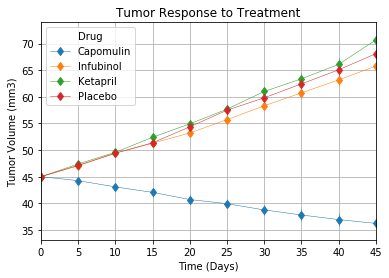

<Figure size 432x288 with 0 Axes>

In [16]:
#Generate the Plot (with Error Bars)

study_mean_df.plot(kind='line', use_index=True, grid=True, yerr=study_error_df, marker='d', linewidth=0.5)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

#Save the chart
plt.savefig('Tumor_Response.png')

## Metastatic Response to Treatment

In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_df = merged_data.groupby(['Drug','Timepoint'])['Metastatic Sites']
mean_met_df = grouped_met_df.mean()

# Convert to DataFrame
mean_met_df = mean_met_df.reset_index()

# Preview DataFrame
mean_met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stderror = grouped_met_df.sem()

# Convert to DataFrame
met_stderror_df = pd.DataFrame(met_stderror)

# Preview DataFrame
met_stderror_df.reset_index(inplace=True)
met_stderror_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [21]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_met_df = mean_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
pivot_met_stderror_df = met_stderror_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
pivot_mean_met_df.head(20)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [23]:
#study of just the 4 drugs
met_study_mean_df = pivot_mean_met_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
met_study_error_df = pivot_met_stderror_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

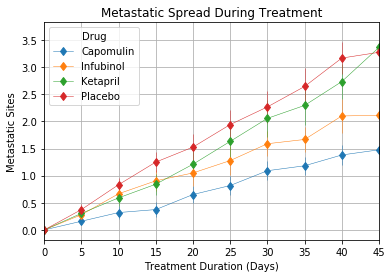

In [26]:
# Generate the Plot (with Error Bars)

met_study_mean_df.plot(kind='line', use_index=True, grid=True, yerr=met_study_error_df, marker='d', linewidth=0.5)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')

# Save the Figure
plt.savefig('Metastatic_Spread.png')

# Show the Figure
plt.show()

## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_df = pd.DataFrame(merged_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count())
survival_df = survival_df.reset_index()
survival_df = survival_df.rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
survival_df.head()



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames
survival_summary = survival_df.pivot(values='Mouse Count', index='Timepoint', columns='Drug')

# Preview the Data Frame
survival_summary


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


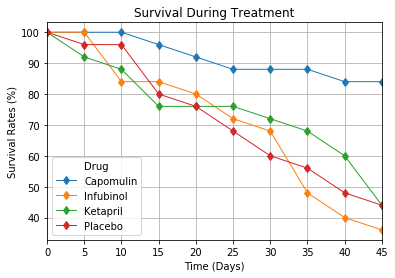

In [32]:
# Generate the Plot (Accounting for percentages)

#Creating the dataframes for the 4 treatments to be analyzed
survival_study = survival_summary[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

#Changing the data in the data frame from count to percentage - grab the initial mice count at the start
total_mice = survival_study.loc[0,:]

#For loop to calculate the percentages at different time points for each treatment to be evaluated
for column in survival_study:
    survival_study[column] = survival_study[column] / total_mice.loc[column] * 100 
    
# Generate the Plot (Accounting for percentages)
survival_study.plot(kind='line', use_index=True, grid=True, marker='d', linewidth=1)

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rates (%)')

# Save the Figure
plt.savefig('Survival_Rates.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [36]:
# Calculate the percent changes for each drug
percent_change = 100 * (pivot_mean_df.loc[45, :] - pivot_mean_df.loc[0, :]) / pivot_mean_df.loc[0, :] 

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

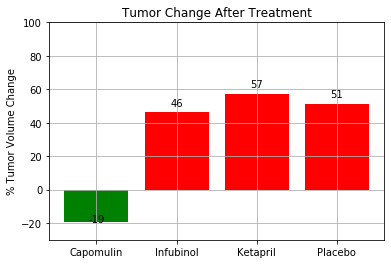

In [38]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
study_percent_change = pd.DataFrame({'Percent Change': percent_change[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]})
study_percent_change['Passing'] = study_percent_change['Percent Change'] < 0

#Create a bar graph
x = study_percent_change.index.values
y = study_percent_change['Percent Change'].values

fig, ax = plt.subplots()
summary = ax.bar(x, y, color=study_percent_change['Passing'].map({True: 'g', False: 'r'}))

#Orient widths. Add labels, tick marks, etc. 
ax.grid()
ax.set_ylim(-30, 100)
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change After Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(summary)

# Save the Figure
plt.savefig('Percent_Tumor_Change.png')

# Show the Figure
fig.show()